In [1]:
import tqdm
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
sns.set_style('ticks')

import kliep

In [2]:
amis = []
tmis = []

for c in tqdm.tqdm(np.arange(0, 0.5, 0.1)):
    cov = np.array([[1, c], [c, 1]])
    X = scipy.stats.multivariate_normal(mean=[0, 0], cov=cov).rvs(3000)
    amis += [kliep.mutual_information_kliep(X[:, 0].reshape(-1, 1), X[:, 1].reshape(-1, 1), maxiter=1000)]
    tmis += [0.5 * (np.sum(np.log(np.diag(cov))) - np.log(np.linalg.det(cov)))]

100%|██████████| 5/5 [00:07<00:00,  1.41s/it]


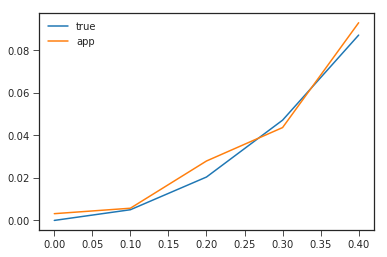

In [3]:
plt.plot(np.arange(0, 0.5, 0.1), tmis, label='true')
plt.plot(np.arange(0, 0.5, 0.1), amis, label='app')
plt.legend()